# アストロスケールホールディンク (186A) 日足

In [13]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [14]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar
from funcs.plot import plot_mm_parabolic, plot_robust_bollinger, plot_histogram_qqplot

In [15]:
code = "186A"
symbol = "%s.T" % code
ticker = yf.Ticker(symbol)

In [16]:
# 日足で過去 2 年分のデータを取得
df0 = ticker.history(period="3y", interval="1d")

# ローソク足のチャートには、そのうち過去 1 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_1y = datetime.timedelta(days=365)
df = df0[df0.index >= dt_last - tdelta_1y]
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-13 00:00:00+09:00,767.0,774.0,738.0,739.0,2119300,0.0,0.0
2025-05-14 00:00:00+09:00,750.0,767.0,735.0,755.0,2035400,0.0,0.0


## 日足チャートとパラボリック SAR

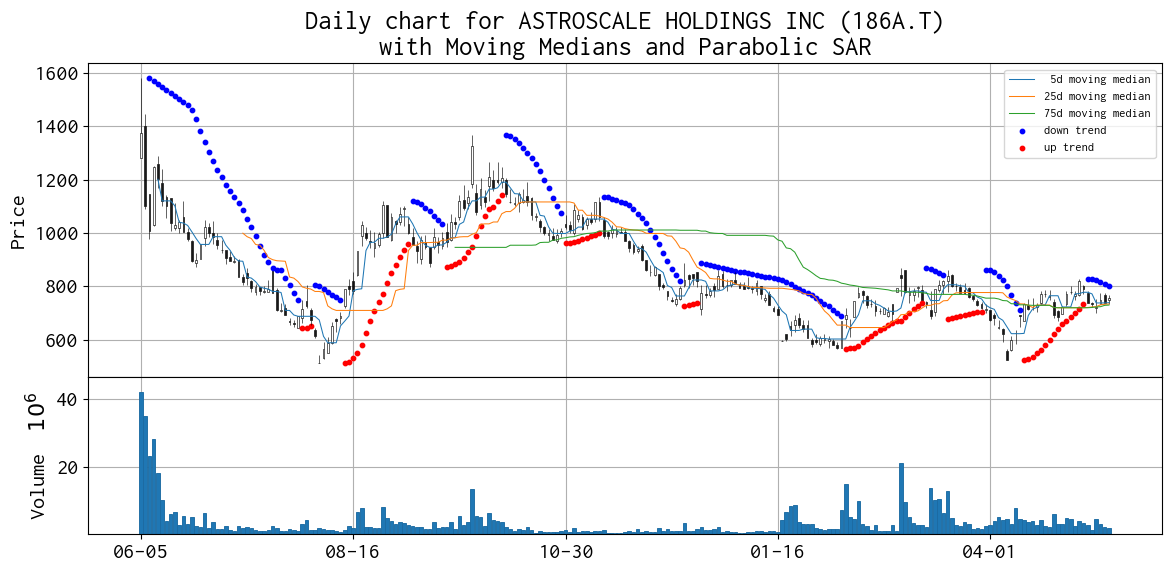

In [17]:
plot_mm_parabolic(ticker, df, df0)

plt.tight_layout()
plt.savefig("report_daily_chart_%s.png" % code)
plt.show()

In [18]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-14 00:00:00+09:00,750.0,767.0,735.0,755.0,2035400,0.0,0.0


In [19]:
df.tail(2)['Close']

Date
2025-05-13 00:00:00+09:00    739.0
2025-05-14 00:00:00+09:00    755.0
Name: Close, dtype: float64

In [20]:
df.tail(2)['Close'].diff()

Date
2025-05-13 00:00:00+09:00     NaN
2025-05-14 00:00:00+09:00    16.0
Name: Close, dtype: float64

In [21]:
df['Close'].rolling(5).median().tail(2)

Date
2025-05-13 00:00:00+09:00    738.0
2025-05-14 00:00:00+09:00    739.0
Name: Close, dtype: float64

In [22]:
df['Close'].rolling(25).median().tail(2)

Date
2025-05-13 00:00:00+09:00    733.0
2025-05-14 00:00:00+09:00    734.0
Name: Close, dtype: float64

## Robust Bollinger's bands

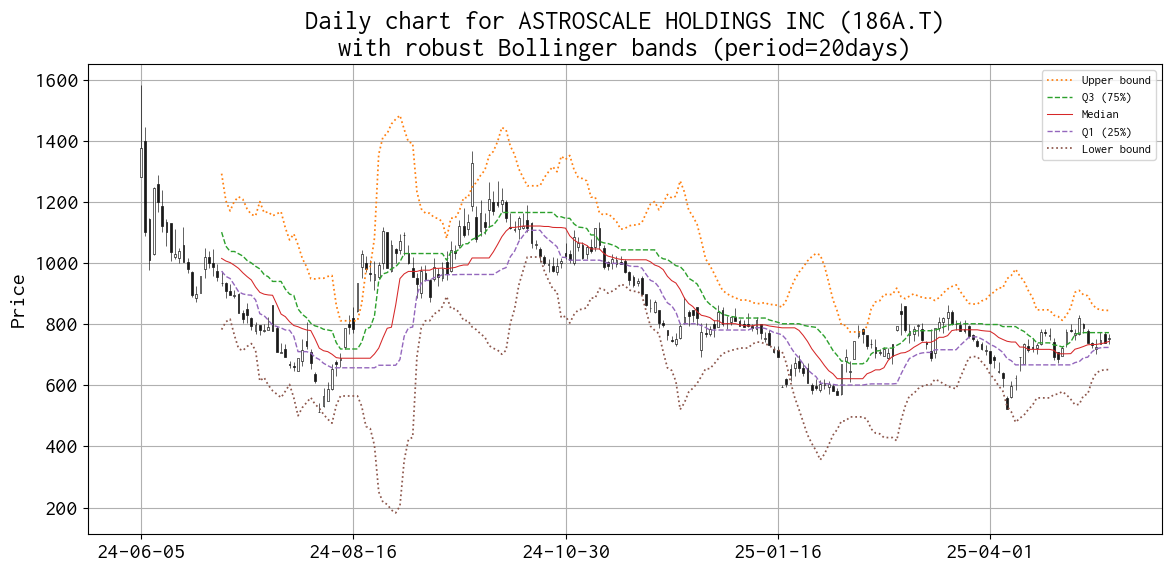

In [23]:
plot_robust_bollinger(ticker, df, df0)

plt.tight_layout()
plt.savefig("report_daily_chart_bollinger_robust_%s.png" % code)
plt.show()

## ヒストグラムと Q-Q プロット

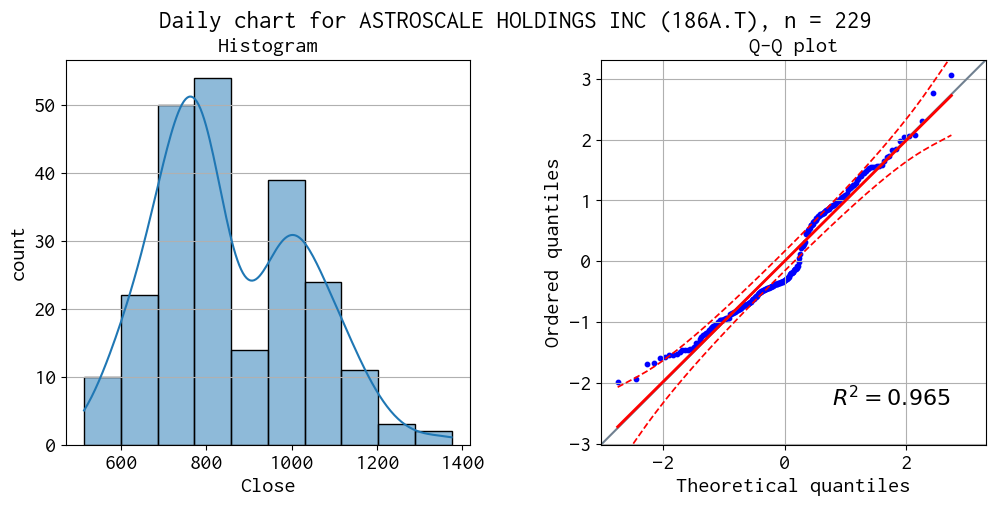

In [24]:
plot_histogram_qqplot(ticker, df)

plt.subplots_adjust(wspace=0.3)
plt.savefig("report_daily_histogram_qqplot_%s.png" % code)
plt.show()